# Analysis and Visualization of Complex Agro-Environmental Data
---
## Bivariate analysis and visualization

In [2]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [3]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [4]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [ ]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

### Visualizing pairs of `categorical` variables

#### Crosstabulate categorical data

In [5]:
ctab = pd.crosstab(df['Eutrophication'], df['Salmo trutta fario'])
print(ctab)


Salmo trutta fario    0     1
Eutrophication               
1.0                 691  2313
3.0                 713   484
4.0                 433   149
5.0                  78    16


#### Barplot

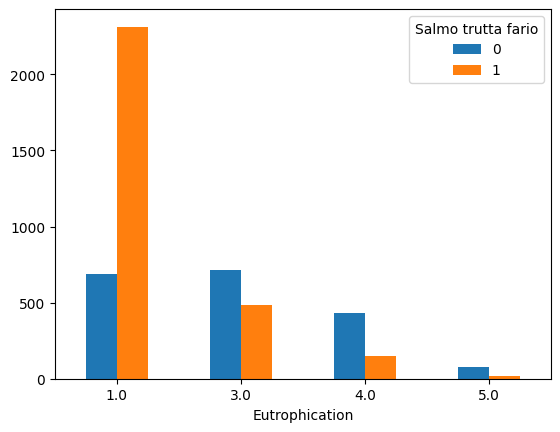

In [6]:

# Creating barplot from crosstable
barplot = ctab.plot.bar(rot=0)

### visualizing `categorical` *versus* `continuous` variables

#### Barplots

`Barplots` are typically used to visualize quantitative variables against categorical variables. This visualization is preferred when there is a limited number of categories and are used when the focus is on comparing quantities. If each category has a correspondent sample of observations, then barplots must show error bars to express data variability.

In [ ]:
sns.barplot(x="Country", y="prec_ann_catch", data=df)

In [ ]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", estimator="mean")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", estimator="mean", color="skyblue")
plt.xticks(rotation=90)
plt.show()

#### Boxplots

`Boxplots` are also often use to visualize quantitative variables against categorical variables but now the focus is on analysing overlap among samples' distributions.

In [ ]:
sns.boxplot(x="Country", y="prec_ann_catch", data=df).set_title("Box plot of Total Annual Precipitation")
plt.show()

#### violin plots

`violin plots` are increasingly used over boxplot to analyse overlap among samples. The probability distribution allows more detail on analysing overlap among samples.  

In [ ]:
dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.violinplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')

#### Stripplots

`Stripplots` are used with the same end as boxplots and violin plots. A `jitter` function is used to randomly display data points along an axis that is perpendicular to the continuous variable axis, which forms a strip of variable width where obervations are plotted. 

Text(0.5, 0, '')

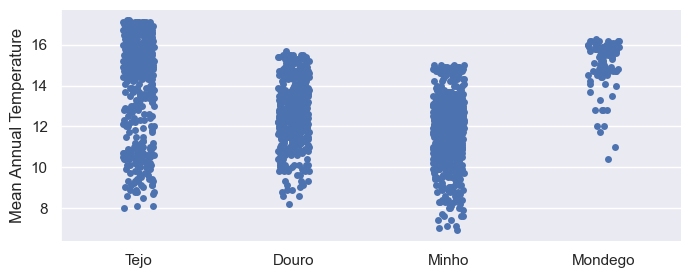

In [52]:
# Less code

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.stripplot(
    data= dfsub,
    x='Catchment_name',
    y='temp_ann',
    )
plt.tick_params(bottom=False) # removes bottom tickmarks
sns.despine(bottom=True)
plt.ylabel('Mean Annual Temperature')
plt.xlabel('')

Text(0, 0.5, '')

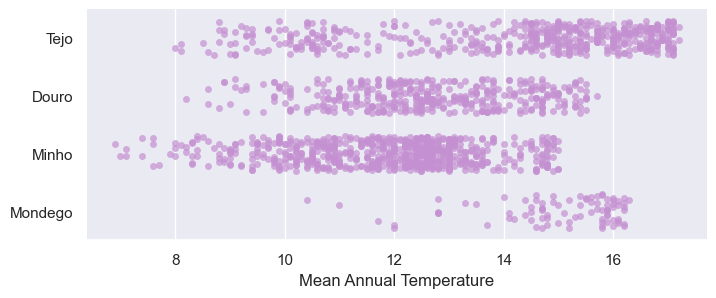

In [64]:
# Less code and inverted

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.3, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the points
    color='#c490d1', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.7,
    s=5 # point size
    )
plt.tick_params(left=False) # removes bottom tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')


#### Mixed visualizations

It is becoming frequent to mix visualizations such as boxplots and strip plots in the same plot, offering complementary information about the data.

##### Box plots with jitter

Text(0, 0.5, '')

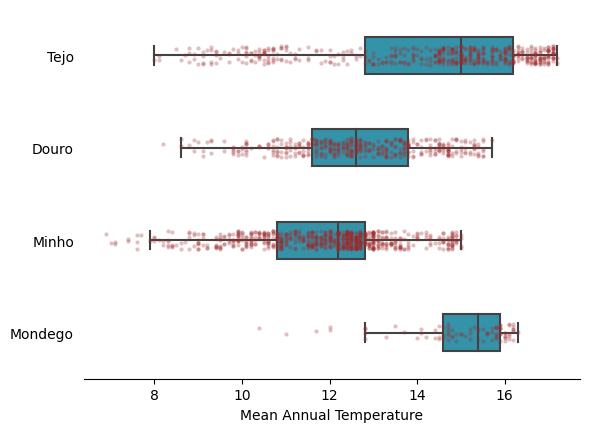

In [6]:

dfsub = df[(df['Catchment_name']=='Mondego') | 
    (df['Catchment_name']=='Douro') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]
sns.boxplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    width=0.4,
    fliersize=0,
    color='#219ebc', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    )
sns.stripplot(
    data= dfsub,
    x='temp_ann',
    y='Catchment_name',
    jitter=0.1, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    color='#9e2a2b', # HEX color picked from here: https://coolors.co/palettes/trending - don't forget to start by "#"
    alpha=.3,
    s=3, # point size
    )
plt.tick_params(left=False) # removes tickmarks
sns.despine(left=True)
plt.xlabel('Mean Annual Temperature')
plt.ylabel('')

### visualizing pairs of `continuous` variables

#### Line plot



In [ ]:
sns.lineplot(data=df, x='temp_ann', y='prec_ann_catch')

#### Scatter plots

`scatter plots` are a useful method of comparing continuous variables against each other. They often are used to map independent and dependent variables on a 2D graph. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

In [ ]:
sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')

In [ ]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')

In [ ]:
g = sns.JointGrid(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot(sns.regplot, sns.boxplot)

In [ ]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hist")

In [ ]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', kind="hex")

In [ ]:
g = sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch')
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [ ]:
sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', palette="colorblind")

In [ ]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country')

In [ ]:
sns.jointplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Country', kind="kde")

In [ ]:
sns.scatterplot(data=df, x='Elevation_mean_catch', y='prec_ann_catch', hue='Catchment_name', palette="colorblind")